# **Exploratory Data Analysis**



In [ ]:
!pip3 install optuna
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('/content/cars_train.csv', encoding='UTF-16', sep='\t', encoding_errors='ignore', na_values=['-', ''])
df_test = pd.read_csv('/content/cars_test.csv', encoding='UTF-16', sep='\t', encoding_errors='ignore', na_values=['-', ''])

In [ ]:
df_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [ ]:
df_train.shape

(29584, 29)

In [ ]:
df_train.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

In [ ]:
df_train.loc[df_train.duplicated()]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco


In [ ]:
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [ ]:
df_test.isnull().sum()

id                            0
num_fotos                    60
marca                         0
modelo                        0
versao                        0
ano_de_fabricacao             0
ano_modelo                    0
hodometro                     0
cambio                        0
num_portas                    0
tipo                          0
blindado                      0
cor                           0
tipo_vendedor                 0
cidade_vendedor               0
estado_vendedor               0
anunciante                    0
entrega_delivery              0
troca                         0
elegivel_revisao              0
dono_aceita_troca          2554
veiculo_único_dono         6387
revisoes_concessionaria    6795
ipva_pago                  3298
veiculo_licenciado         4518
garantia_de_fábrica        8439
revisoes_dentro_agenda     7869
veiculo_alienado           9862
dtype: int64

In [ ]:
df_train.drop('veiculo_alienado', axis=1, inplace=True)#Removendo coluna sem valores
df_test.drop('veiculo_alienado', axis=1, inplace=True)#Removendo coluna sem valores

#Verificando colunas com valores vazios
cols= 'marca,modelo,veiculo_único_dono,dono_aceita_troca,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda'.split(',')
for col in cols:
  agrupado = df_train.groupby([col]).size()
  print(agrupado)
  print()

marca
ALFA ROMEO          9
AUDI             1698
BMW              1784
BRM                 1
CHERY             153
CHEVROLET        3020
CHRYSLER           30
CITROËN           194
DODGE              37
EFFA                1
FERRARI             1
FIAT             1918
FORD             1060
HONDA            1586
HYUNDAI          2043
IVECO               2
JAC                 3
JAGUAR            148
JEEP             2000
KIA               408
LAND ROVER        760
LEXUS              75
LIFAN               8
MASERATI            7
MERCEDES-BENZ    1125
MINI              137
MITSUBISHI        862
NISSAN            438
PEUGEOT          1675
PORSCHE           349
RAM               168
RENAULT           538
SMART              12
SSANGYONG          14
SUBARU             41
SUZUKI             41
TOYOTA           2180
TROLLER           177
VOLKSWAGEN       4594
VOLVO             287
dtype: int64

modelo
116i       1
118i       2
120i      46
125i       4
130i      11
          ..
Z4        18
ZA

In [ ]:
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
preco                          0
dtype: int64

# **Data Preprocessing**



In [ ]:
df_train["num_fotos"].fillna("0", inplace=True)
df_train["dono_aceita_troca"].fillna("Não aceita troca", inplace=True)
df_train["veiculo_único_dono"].fillna("Não", inplace=True)
df_train["revisoes_concessionaria"].fillna("Não", inplace=True)
df_train["ipva_pago"].fillna("Não", inplace=True)
df_train["veiculo_licenciado"].fillna("Não", inplace=True)
df_train["garantia_de_fábrica"].fillna("Não", inplace=True)
df_train["revisoes_dentro_agenda"].fillna("Não", inplace=True)

In [ ]:
df_train.isnull().sum()

id                         0
num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
revisoes_dentro_agenda     0
preco                      0
dtype: int64

In [ ]:
df_test["num_fotos"].fillna("0", inplace=True)
df_test["dono_aceita_troca"].fillna("Não aceita troca", inplace=True)
df_test["veiculo_único_dono"].fillna("Não", inplace=True)
df_test["revisoes_concessionaria"].fillna("Não", inplace=True)
df_test["ipva_pago"].fillna("Não", inplace=True)
df_test["veiculo_licenciado"].fillna("Não", inplace=True)
df_test["garantia_de_fábrica"].fillna("Não", inplace=True)
df_test["revisoes_dentro_agenda"].fillna("Não", inplace=True)

In [ ]:
df_test.isnull().sum()

id                         0
num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
revisoes_dentro_agenda     0
dtype: int64

In [ ]:
cols= 'veiculo_único_dono,estado_vendedor,dono_aceita_troca,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,entrega_delivery,troca,elegivel_revisao,blindado,num_portas,cambio,tipo'.split(',')
for col in cols:
  agrupado = df_train.groupby([col]).size()
  print(agrupado)
  print()

veiculo_único_dono
Não           19161
Único dono    10423
dtype: int64

estado_vendedor
Acre (AC)                      29
Alagoas (AL)                  125
Amazonas (AM)                  51
Bahia (BA)                    604
Ceará (CE)                     69
Espírito Santo (ES)            21
Goiás (GO)                    789
Maranhão (MA)                   7
Mato Grosso (MT)               33
Mato Grosso do Sul (MS)        35
Minas Gerais (MG)            1775
Paraná (PR)                  2526
Paraíba (PB)                  108
Pará (PA)                      74
Pernambuco (PE)               318
Piauí (PI)                      6
Rio Grande do Norte (RN)       90
Rio Grande do Sul (RS)       1646
Rio de Janeiro (RJ)          2548
Rondônia (RO)                   4
Roraima (RR)                    2
Santa Catarina (SC)          2302
Sergipe (SE)                   24
São Paulo (SP)              16378
Tocantins (TO)                 20
dtype: int64

dono_aceita_troca
Aceita troca        21922
Não

In [ ]:
df_train.shape

(29584, 28)

**Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

Espirito Santo(ES). Pois sendo o custo médio do carro popular R$90.000,00,
 se avaliarmos pelos gráficos, esse é o estado que mais vende veiculos nessa faixa de valor.



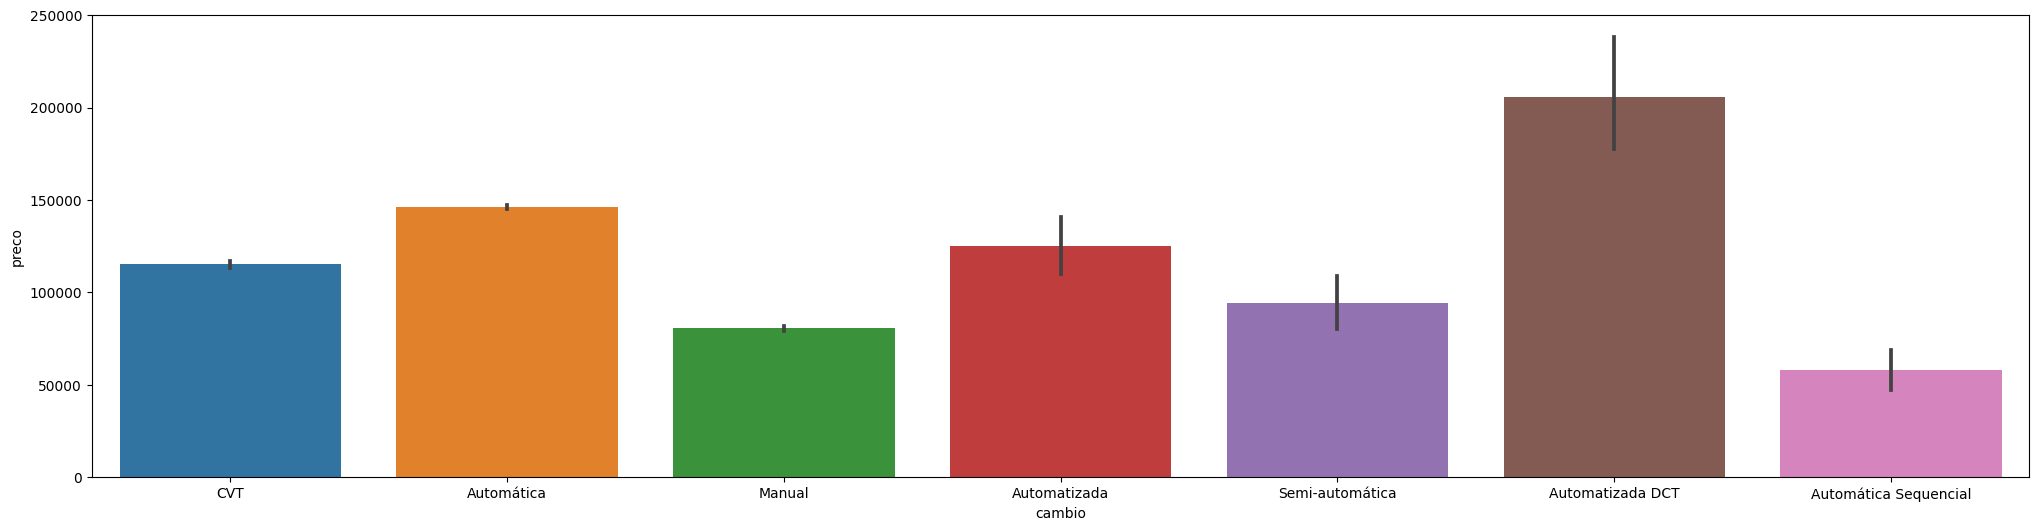

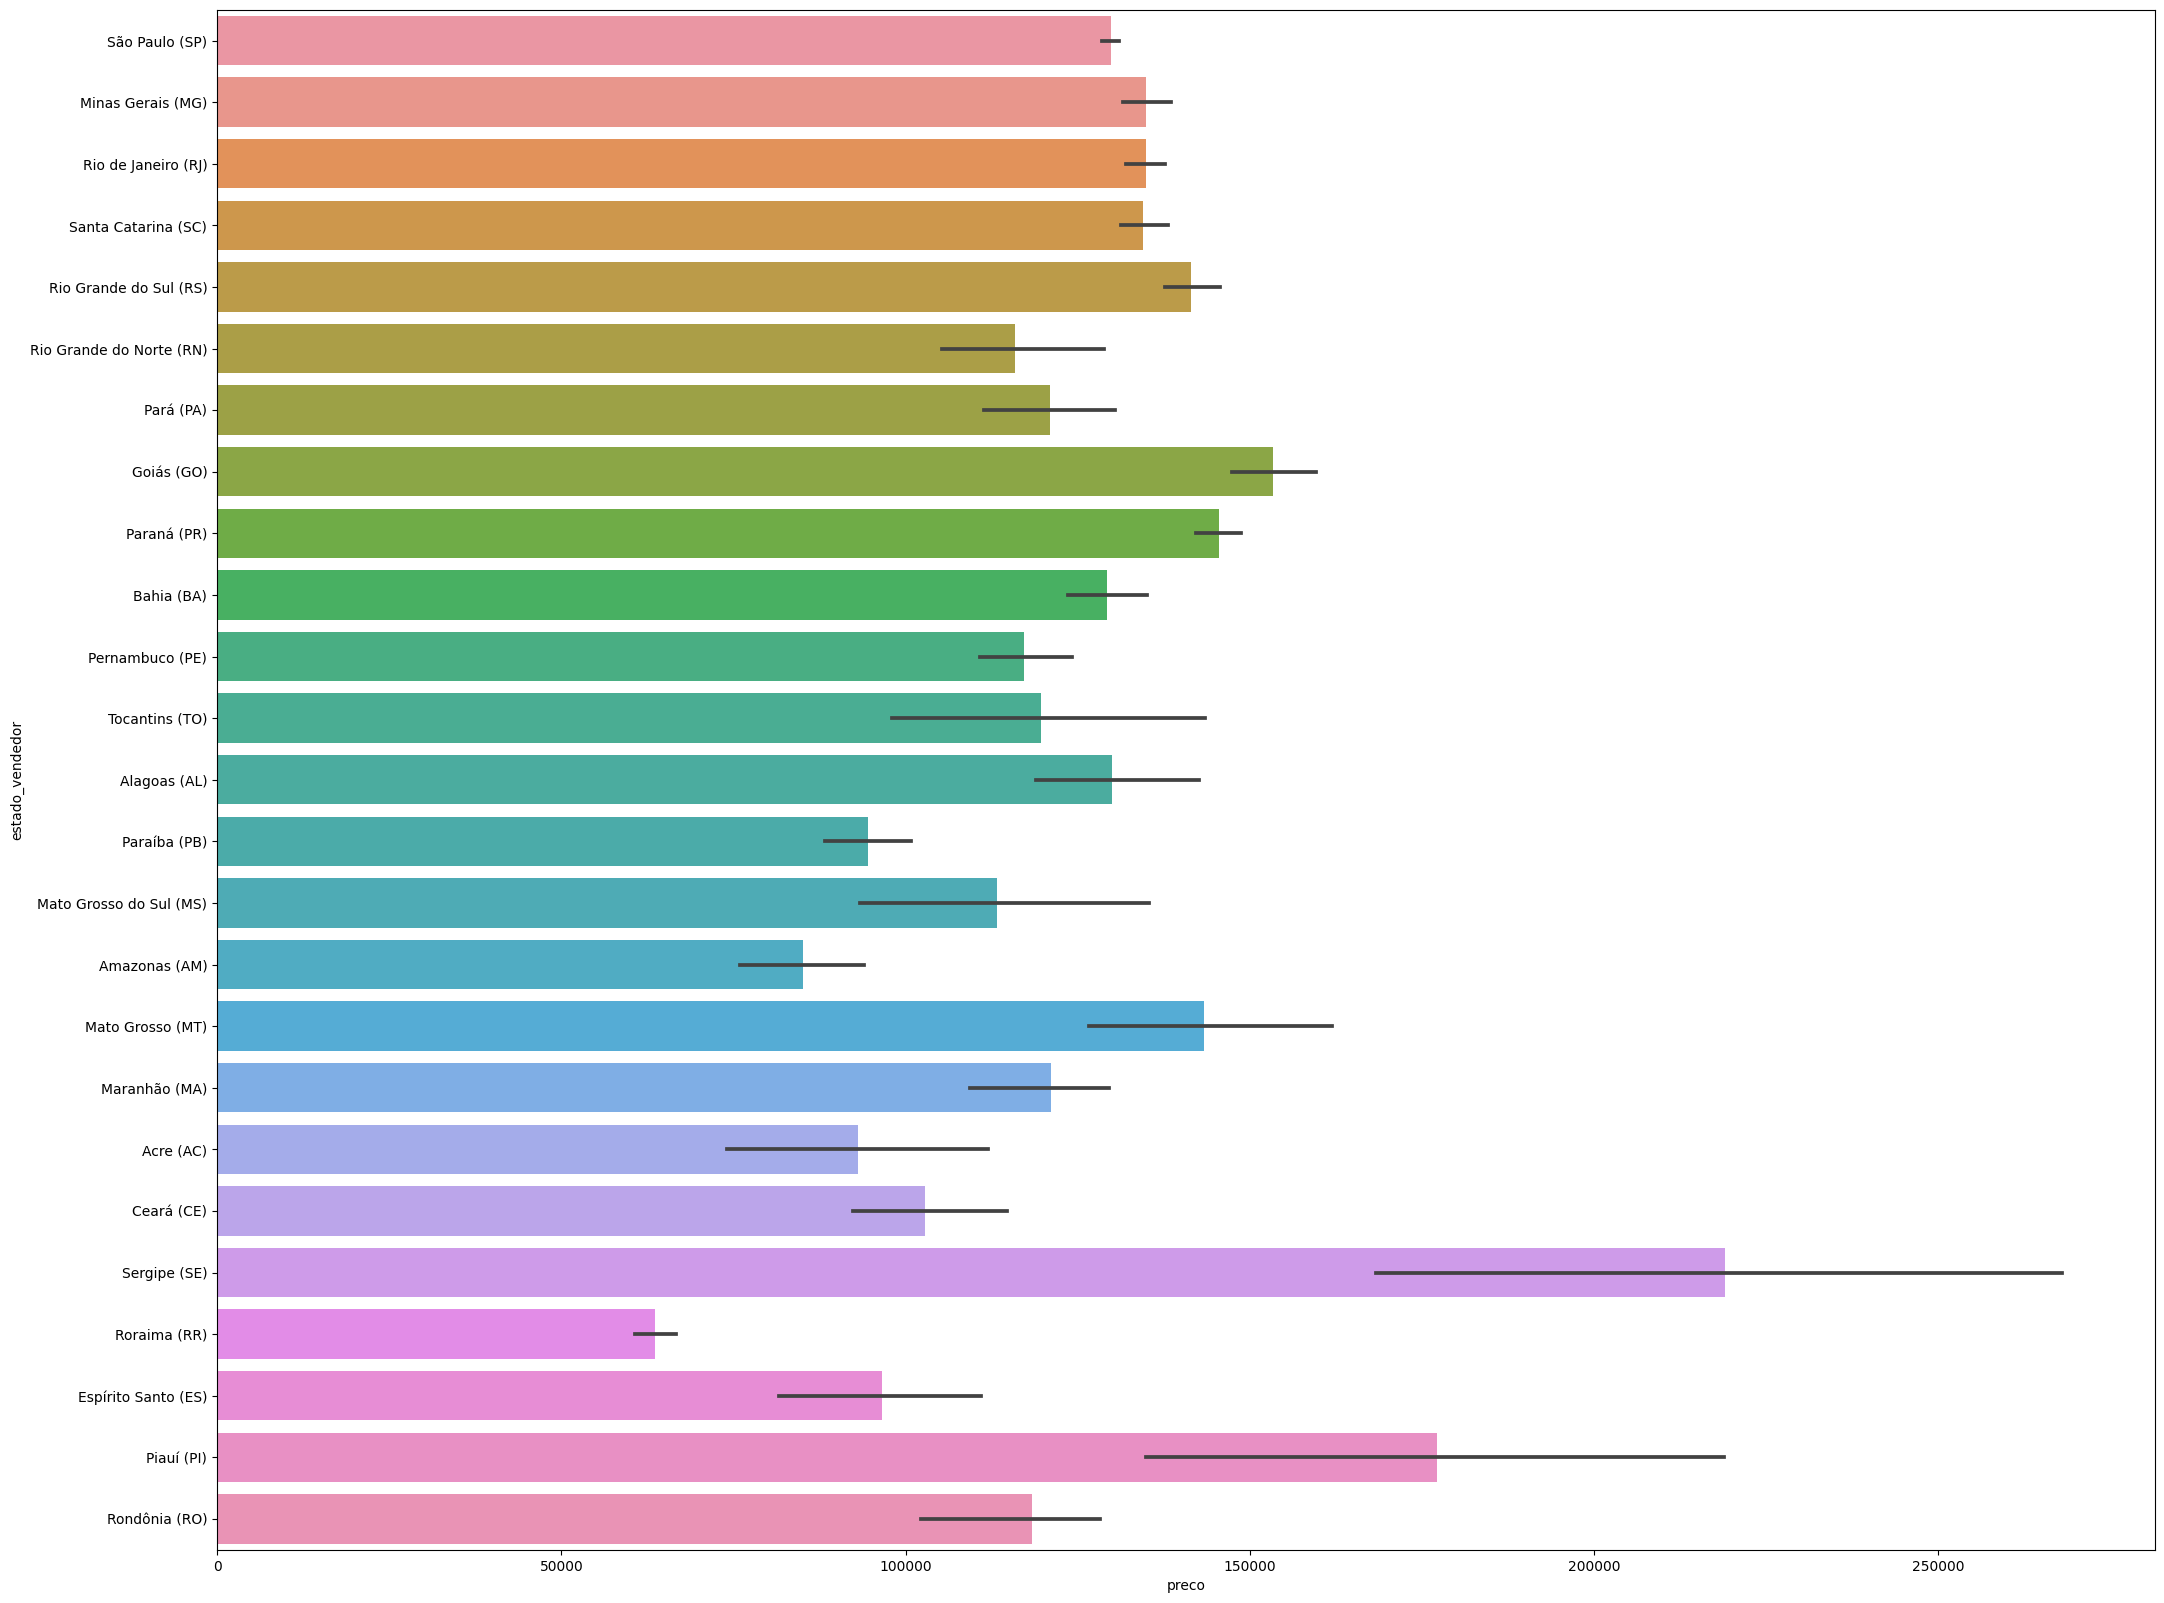

In [ ]:
plt.figure(figsize=(25, 6))
ax= sns.barplot(x= df_train['cambio'], y=df_train['preco'], data = df_train.sort_values('preco'))
plt.show()


plt.figure(figsize=(25, 20))
ax= sns.barplot(x= df_train['preco'], y=df_train['estado_vendedor'], data = df_train.sort_values('preco'))
plt.show()

In [ ]:
df_train.shape

(29584, 28)

In [ ]:
from scipy.stats import t
from scipy.stats import normaltest
import math

#H0 a média do valor do valor de veiculos 2010 é R$50.000,00
media = df_train.loc[df_train['ano_modelo'] == 2010].preco.mean()
desvio = df_train.loc[df_train['ano_modelo'] == 2010].preco.std()
alfa = 0.05
n = 29584

Z = (media-50000)/(desvio)/math.sqrt(n)
Z

0.0012678354194328096

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_train.drop('elegivel_revisao', axis=1, inplace=True)#Removendo coluna pois só possui valores vazios
cols_to_encode = ['cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
                  'anunciante','marca','modelo','veiculo_único_dono',
                  'dono_aceita_troca','revisoes_concessionaria','ipva_pago',
                  'veiculo_licenciado','garantia_de_fábrica',
                  'revisoes_dentro_agenda','entrega_delivery','troca',
                  'blindado','num_portas','cambio','tipo']
labelencoder = LabelEncoder()

for col in cols_to_encode:
  df_train[col] = labelencoder.fit_transform(df_train[col])
  df_test[col] = labelencoder.fit_transform(df_test[col])


df_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,300716223898539419613863097469899222392,8.0,27,257,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,4,2,...,0,0,1,0,1,0,0,1,0,74732.590084
1,279639842134129588306469566150288644214,8.0,18,133,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,2,2,...,0,0,0,0,0,0,1,1,0,81965.332634
2,56414460810621048900295678236538171981,16.0,19,378,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,2,2,...,1,0,0,0,0,1,1,1,0,162824.814472
3,56862509826849933428086372390159405545,14.0,38,63,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,2,2,...,1,1,0,0,0,0,0,1,0,123681.358857
4,338980975753200343894519909855598027197,8.0,33,259,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,2,2,...,0,0,1,0,1,1,1,0,1,82419.763891


In [ ]:
df_train.dtypes

id                          object
num_fotos                   object
marca                        int64
modelo                       int64
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                       int64
num_portas                   int64
tipo                         int64
blindado                     int64
cor                          int64
tipo_vendedor                int64
cidade_vendedor              int64
estado_vendedor              int64
anunciante                   int64
entrega_delivery             int64
troca                        int64
dono_aceita_troca            int64
veiculo_único_dono           int64
revisoes_concessionaria      int64
ipva_pago                    int64
veiculo_licenciado           int64
garantia_de_fábrica          int64
revisoes_dentro_agenda       int64
preco                      float64
dtype: object

# **Feature Analysis**


<ipython-input-24-ca39cd82c32a>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(ax=ax)


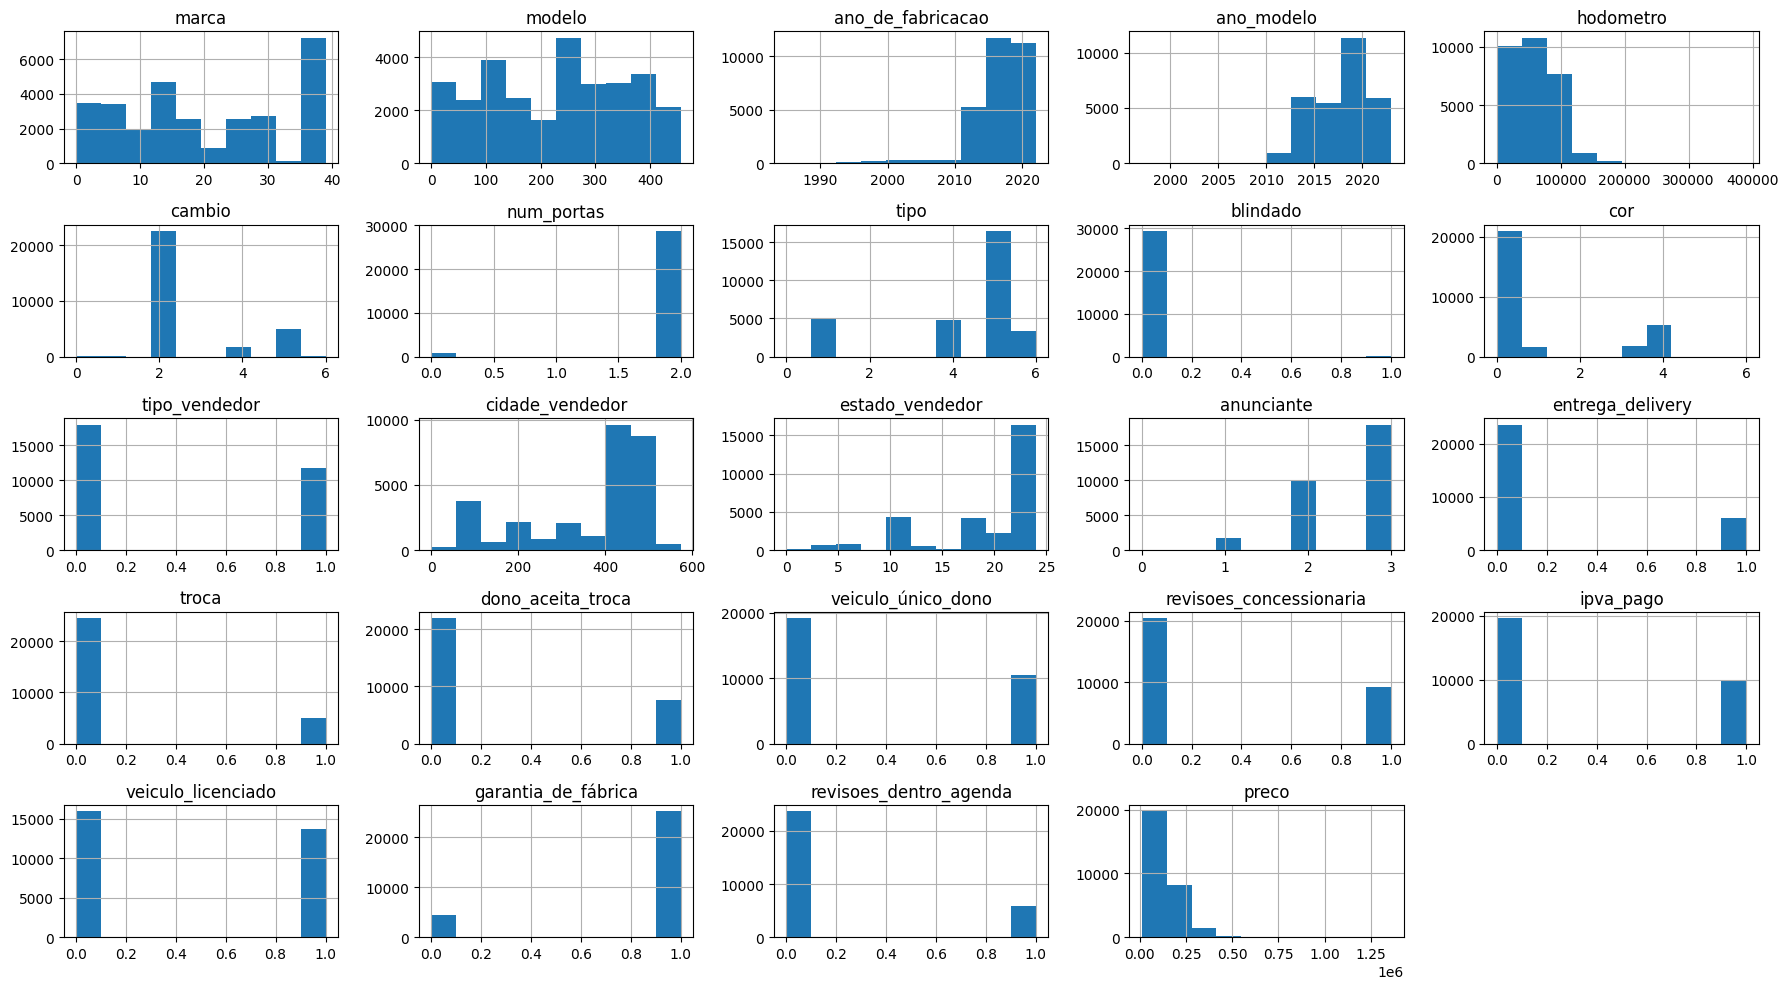

In [ ]:
fig,ax = plt.subplots(figsize=(18,10))
df_train.hist(ax=ax)

plt.tight_layout()
plt.show();

<ipython-input-25-6aaecd509bc8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.preco)


<Axes: >

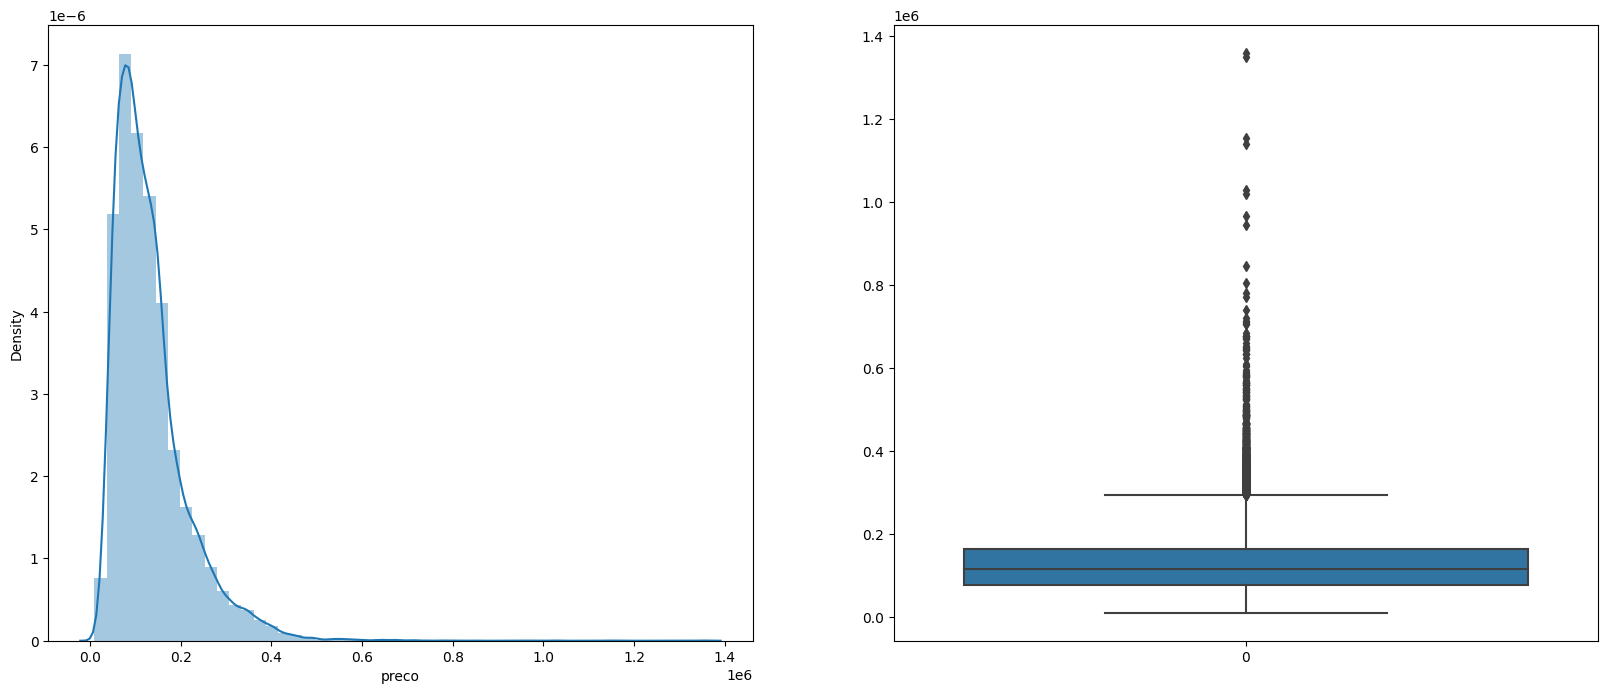

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df_train.preco)

plt.subplot(1,2,2)
sns.boxplot(df_train.preco)

A coluna que vamos prever não possui distribuição normal.

In [ ]:
print(df_train.preco.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    2.958400e+04
mean     1.330239e+05
std      8.166287e+04
min      9.869951e+03
25%      7.657177e+04
50%      1.143558e+05
75%      1.636796e+05
85%      2.047921e+05
90%      2.378652e+05
100%     1.359813e+06
max      1.359813e+06
Name: preco, dtype: float64


<ipython-input-27-00e428aa25de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_train.corr()


<Axes: >

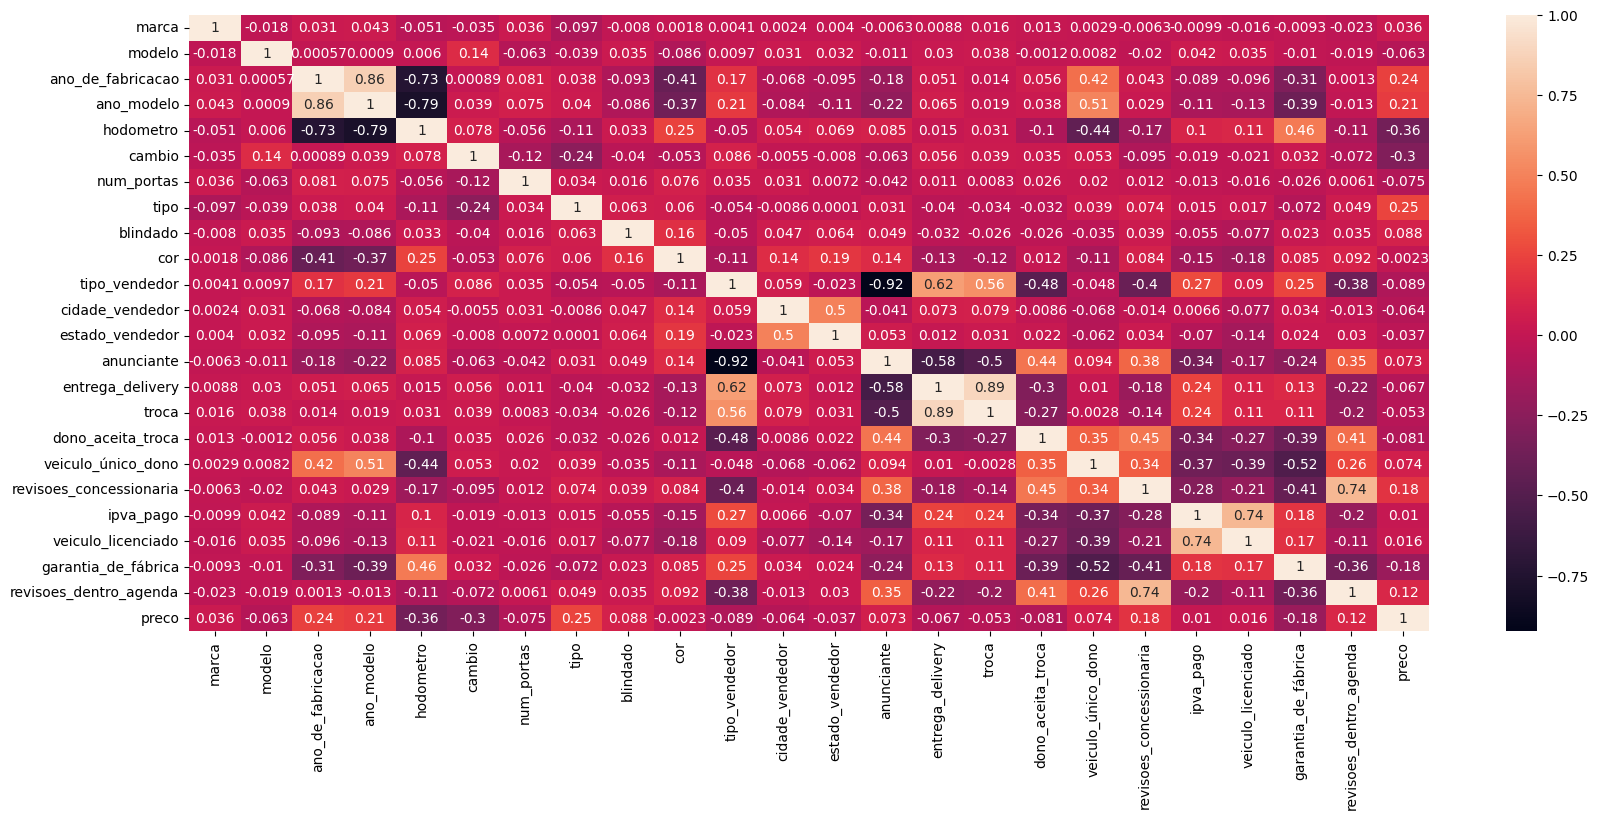

In [ ]:
%matplotlib inline

cor = df_train.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor, annot=True)

In [ ]:
cols_cat = df_train[['cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante']]

cols_num = df_train[['marca','modelo','ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'entrega_delivery', 'troca', 'dono_aceita_troca',
       'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
       'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda','cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante']]

dic= {}

for label in cols_num:
  p1 = df_train.preco.cov(df_train[label])/(df_train.preco.std()*df_train[label].std())
  dic[label] = p1

for label in sorted(dic, key = dic.get):
  print(f"{dic[label]} = {label} X Preço")

-0.35921805895216197 = hodometro X Preço
-0.2979171171433844 = cambio X Preço
-0.18324930390288563 = garantia_de_fábrica X Preço
-0.0894895877188468 = tipo_vendedor X Preço
-0.08120835263075118 = dono_aceita_troca X Preço
-0.07526466905887855 = num_portas X Preço
-0.06742689577289981 = entrega_delivery X Preço
-0.06374204349181294 = cidade_vendedor X Preço
-0.06272879046545839 = modelo X Preço
-0.053444117882445255 = troca X Preço
-0.036534419002052544 = estado_vendedor X Preço
-0.002347094837568465 = cor X Preço
0.010064015446045562 = ipva_pago X Preço
0.015878757266106172 = veiculo_licenciado X Preço
0.03596147450127728 = marca X Preço
0.07341085803539288 = anunciante X Preço
0.074115526995363 = veiculo_único_dono X Preço
0.08774637697402188 = blindado X Preço
0.1166494507404686 = revisoes_dentro_agenda X Preço
0.17932243664167327 = revisoes_concessionaria X Preço
0.21485372852552906 = ano_modelo X Preço
0.23917185893768333 = ano_de_fabricacao X Preço
0.24875518110002007 = tipo X Pre

# **Training**

In [ ]:
X = df_train[['hodometro','cambio','tipo','ano_de_fabricacao','ano_modelo']]
Y = df_train.preco
X_test = df_test

In [ ]:
def calculate_r_squared(x, y):
  return metrics.r2_score(x, y)

def calculate_mse(x, y):
  return metrics.mean_squared_error(x, y)

def calculate_rmse(x, y):
  return np.sqrt(metrics.mean_squared_error(x, y))

In [ ]:
regressor = XGBRegressor(n_estimators = 400, booster= 'gbtree', max_depth=6,
                         learning_rate =0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

model = regressor.fit(X_train, y_train)

#prediction training data
test_data_prediction = regressor.predict(X_test)

train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score: ', test_score)
print("Overfitting" if train_score > test_score else "Underfitting")
print(f'Precisão do modelo: %.2f%%' % (train_score*100))
print('R squared(train) = ', calculate_r_squared(y_test, test_data_prediction))

Train Score:  0.7582076529684643
Test Score:  0.40461825138557517
Overfitting
Precisão do modelo: 75.82%
R squared(train) =  0.40461825138557517


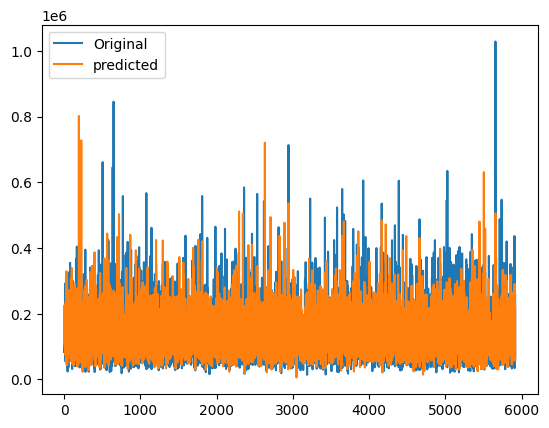

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label='Original')
plt.plot(x_ax, test_data_prediction, label='predicted')
plt.legend()
plt.show()

In [ ]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(learning_rate = 0.05,
                     n_estimators = 600,
                     subsample = 0.75,
                     random_state = 0)

model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_test)

train_score = model_lgbm.score(X_train, y_train)
test_score = model_lgbm.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score: ', test_score)
print("Overfitting" if train_score > test_score else "Underfitting")
print(f'Precisão do modelo: %.2f%%' % (train_score*100))
print('R squared(train) = ', calculate_r_squared(y_test, test_data_prediction))

Train Score:  0.5683605084510335
Test Score:  0.465709382485028
Overfitting
Precisão do modelo: 56.84%
R squared(train) =  0.40461825138557517


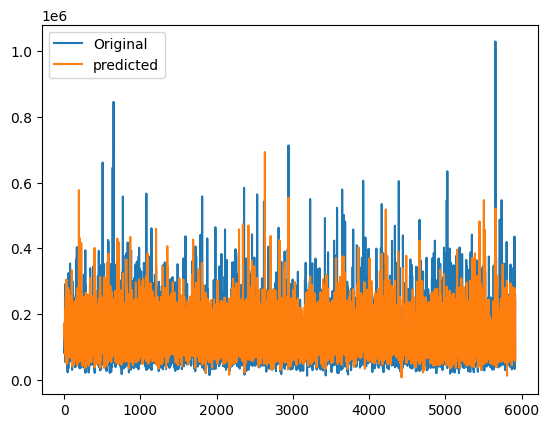

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label='Original')
plt.plot(x_ax, y_pred, label='predicted')
plt.legend()
plt.show()

# **Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**

Foi utilizado as colunas hodometro, cambio, tipo, ano_de_fabricacao e ano_modelo para o treinamento pois foram as que tiveram uma maior correlação com a coluna preço que queremos prever. Estamos resolvendo um problema de regressão. Os modelos foram avaliados pela curva de aprendizado e o modelo com melhor desempenho foi o LGBMRegressor pois teve pontuações próximas, sendo 0.5683605084510335 de treino e 0.465709382485028 de teste com Overfitting. Seus prós será que a predição será mais aproximada do valor de teste e o contra será que o modelo continuará com perdas.